In [1]:
import os.path
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame

In [13]:
"""Load files into memory"""

# Baseline results
TEST_RESULT_FOLDER = Path("C:\\Users\\tizia\\PycharmProjects\\DDQN_Trading_MSC\\model_archive\\TestResults\\RewardFunctionTests")
GRAPH_OUTPUT = Path("./graphs")
BASE_LINES = TEST_RESULT_FOLDER.joinpath("simple_profit")
RUNTIME_RELATIVE = "rewards.csv"
METRICS_RELATIVE = "final\\validation\\metrics.csv"
REFERENCE_CAPITAL = "final\\validation\\test_reference_raw.csv"

Reward_function_name = "simpleProfit"

runtime_protocols = []
protocol_cols = [
    'steps',
    'avg_reward',
    'avg_loss',
    'avg_td_error',
    'capital'
]

result_metrics = []
metric_cols = [
    'model_name',
    'stock',
    'evaluation_mode',
    'V_i',
    'V_f',
    'return',
    'total_volatility',
    'sharpe_ratio',
    'transactions_per_30_t'
]

capital_references = []

if os.path.exists(BASE_LINES):
    file_names = os.listdir(BASE_LINES)
    print(f"Found {len(file_names)} potential baseline result folders:")
    print(file_names)
    for i, f_name in enumerate(file_names):
        file = BASE_LINES.joinpath(f_name)
        if os.path.isdir(file):
            rp_df = pd.read_csv(file.joinpath(RUNTIME_RELATIVE))
            rp_df = rp_df[protocol_cols]
            runtime_protocols.append(rp_df)
            rm_df = pd.read_csv(file.joinpath(METRICS_RELATIVE))
            rm_df = rm_df[metric_cols]
            result_metrics.append(rm_df)
            cr_df = pd.read_csv(file.joinpath(REFERENCE_CAPITAL))
            cr_df = cr_df[['portfolio']].values[0][0]
            capital_references.append(cr_df)
            print(f"[{i}] protocol:{rp_df.shape}, metrics:{rm_df.shape}")
    if len(runtime_protocols) > 0 and len(result_metrics) > 0:
        print("-"*10 + "EXAMPLE VALUES" + "-"*56)
        print(f"Protocol:\n{runtime_protocols[0]}")
        print("-"*80)
        print(f"Metrics:\n{result_metrics[0]}")
        print("-"*80)
        print(f"Capital Ref:\n{capital_references[0]}")
        print("-"*80)
else:
    print(f"Folder: {BASE_LINES} was not found. Nothing was loaded.")

Found 8 potential baseline result folders:
['1695668429', '1695670111', '1695671574', '1695672935', '1695674250', '1695675508', '1695676720', '1695677875']
[0] protocol:(1500, 5), metrics:(3, 9)
[1] protocol:(1500, 5), metrics:(3, 9)
[2] protocol:(1500, 5), metrics:(3, 9)
[3] protocol:(1500, 5), metrics:(3, 9)
[4] protocol:(1500, 5), metrics:(3, 9)
[5] protocol:(1500, 5), metrics:(3, 9)
[6] protocol:(1500, 5), metrics:(3, 9)
[7] protocol:(1500, 5), metrics:(3, 9)
----------EXAMPLE VALUES--------------------------------------------------------
Protocol:
      steps  avg_reward   avg_loss  avg_td_error     capital
0        36 -276.552707  13.394762   -621.760963   44.102571
1        72 -277.221191   8.409282   -563.571603   20.037225
2       108 -276.934353  11.196845   -471.013235   30.361713
3       144 -277.010037  11.122758   -455.894833   27.639663
4       180 -276.687283  11.697617   -531.446307   39.258290
...     ...         ...        ...           ...         ...
1495  53856 -2

In [3]:
# Referencing metric results
BASE_LINES_REF = TEST_RESULT_FOLDER.joinpath("Baseline_refined_DDQN")
result_metrics_ref = []
if os.path.exists(BASE_LINES_REF):
    file_names = os.listdir(BASE_LINES_REF)
    print(f"Found {len(file_names)} potential baseline_ref result folders:")
    print(file_names)
    for i, f_name in enumerate(file_names):
        file = BASE_LINES_REF.joinpath(f_name)
        if os.path.isdir(file):
            rm_df = pd.read_csv(file.joinpath(METRICS_RELATIVE))
            rm_df = rm_df[metric_cols]
            result_metrics_ref.append(rm_df)
            print(f"[{i}] metrics:{rm_df.shape}")
    if len(result_metrics_ref) > 0:
        print("-"*10 + "EXAMPLE VALUES" + "-"*56)
        print(f"Metrics:\n{result_metrics_ref[0]}")
        print("-"*80)
else:
    print(f"Folder: {BASE_LINES_REF} was not found. Nothing was loaded.")

Folder: C:\Users\tizia\PycharmProjects\DDQN_Trading_MSC\model_archive\TestResults\RewardFunctionTests\Baseline_refined_DDQN was not found. Nothing was loaded.


In [4]:
"""Metric box plots - probably not needed for a single configuration."""
metric_df_1 = pd.concat(result_metrics).reset_index(drop=True).fillna(-1)
metric_df_1['evaluation_mode'] = metric_df_1['evaluation_mode'].astype(int)
metric_df_1['type'] = 'DQN'
bh_row = metric_df_1.head(1).copy()
bh_row['type'] = 'Buy&Hold'
bh_row = bh_row[['return', 'total_volatility', 'type']]
metric_df_1 = metric_df_1[metric_df_1['evaluation_mode']==0].reset_index(drop=True)
metric_df_1 = metric_df_1[['return', 'total_volatility', 'type']]

metric_df_2 = pd.concat(result_metrics_ref).reset_index(drop=True).fillna(-1)
metric_df_2['evaluation_mode'] = metric_df_2['evaluation_mode'].astype(int)
metric_df_2['type'] = 'DDQN'
metric_df_2 = metric_df_2[metric_df_2['evaluation_mode']==0].reset_index(drop=True)
metric_df_2 = metric_df_2[['return', 'total_volatility', 'type']]



comparison_df = pd.concat([bh_row, metric_df_1, metric_df_2]).reset_index(drop=True)
plt.figure(figsize=(4, 3))
comparison_df.boxplot(column=['return'], by=['type'])
plt.suptitle('')
plt.tight_layout()
plt.title('Return comparison')
plt.xlabel('')
plt.ylabel('Return factor')
plt.ylim(0, 1.5)
plt.grid(axis='x')
plt.savefig(GRAPH_OUTPUT.joinpath("return_comparison.png"))
plt.close()

comparison_df.boxplot(column=['total_volatility'], by=['type'])
plt.suptitle('')
plt.title('Volatility comparison')
plt.xlabel('')
plt.ylabel('Total volatility')
plt.ylim(0, 0.5)
plt.grid(axis='x')
plt.savefig(GRAPH_OUTPUT.joinpath("volatility_comparison.png"))
plt.close()

ValueError: No objects to concatenate

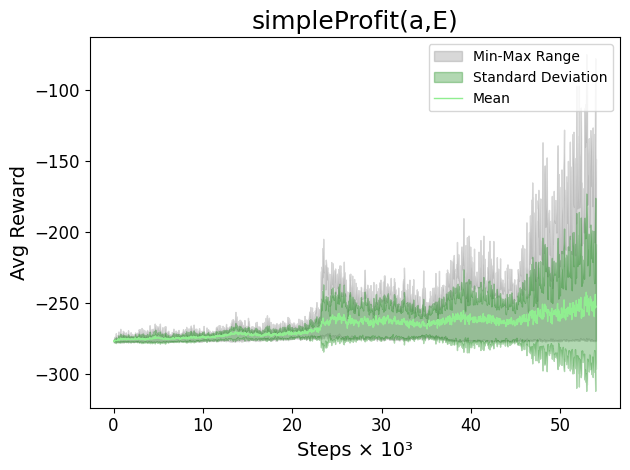

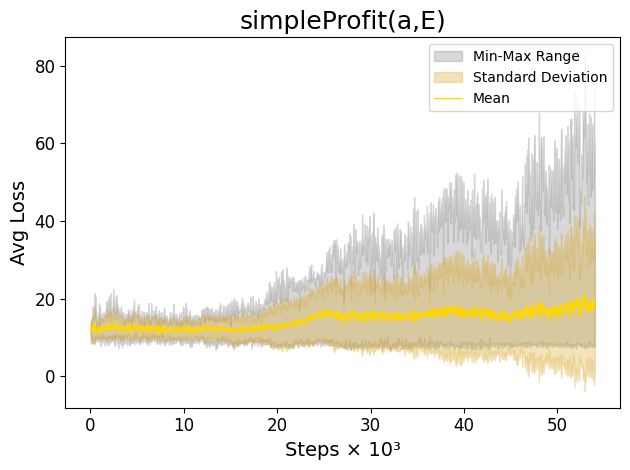

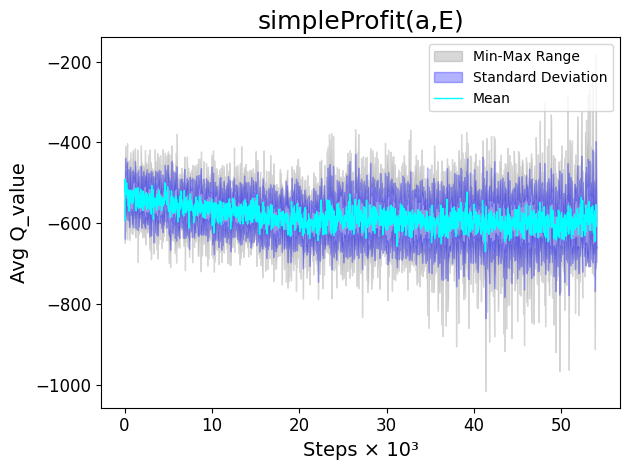

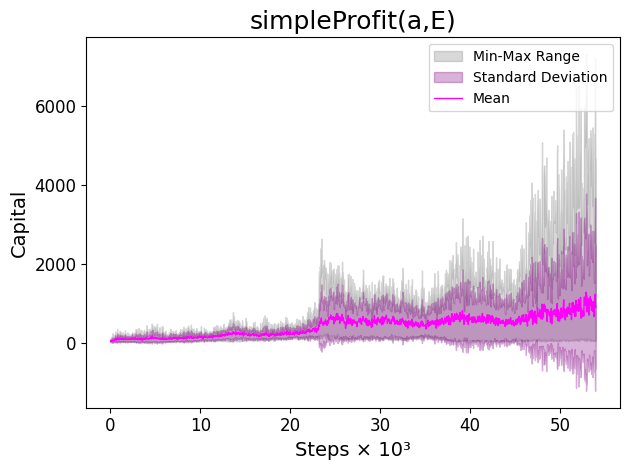

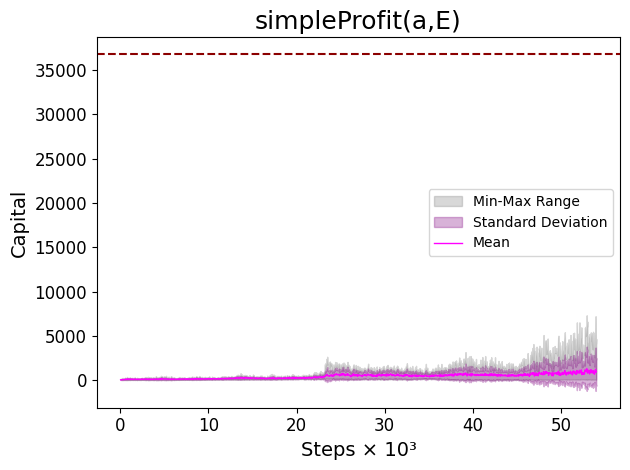

In [14]:
rewards_protocols = []
loss_protocols = []
q_protocols = []
cap_protocols = []
for i, p in enumerate(runtime_protocols):
    p = p.rename(columns={'avg_reward': f'reward_{i}', 'avg_loss': f'loss_{i}', 'avg_td_error': f'Q_{i}', 'capital':f'capital_{i}'})
    rewards_protocols.append(p[['steps', f'reward_{i}']])
    loss_protocols.append(p[['steps', f'loss_{i}']])
    q_protocols.append(p[['steps', f'Q_{i}']])
    cap_protocols.append(p[['steps', f'capital_{i}']])

buy_and_hold_hurdle = capital_references[0]
episodes = len(cap_protocols[0])

def plot(df, colors, r_function, file_suffix, y_name, show_ref_line):
    df = df.loc[:,~df.columns.duplicated()].copy()
    df['steps'] = df['steps'] / 1000
    df.set_index('steps', inplace=True)
    m_series = df.mean(axis=1)
    std_series = df.std(axis=1)
    _min = df.min(axis=1)
    _max = df.max(axis=1)
    
    plt.fill_between(m_series.index, _min, _max, alpha=0.3, label='Min-Max Range', color='gray')
    plt.fill_between(m_series.index, m_series - std_series, m_series + std_series, alpha=0.3, label='Standard Deviation', color=colors[0])
    plt.plot(m_series, label='Mean', color=colors[1], linewidth=1)
    plt.legend()
    plt.title(f"{r_function}(a,E)", fontsize=18)
    plt.xlabel("Steps \u00D7 10³", fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    if show_ref_line:
        plt.axhline(y=buy_and_hold_hurdle, color='darkred', linestyle='--', label='Buy&Hold final capital')
    plt.ylabel(y_name, fontsize=14)
    plt.tight_layout()
    plt.savefig(GRAPH_OUTPUT.joinpath(f"{r_function}{file_suffix}"))
    plt.show()
    plt.close()


# Plot values
plot(pd.concat(rewards_protocols, axis=1), ['green', 'lightgreen'], Reward_function_name, "_reward.png", "Avg Reward", False)
plot(pd.concat(loss_protocols, axis=1), ['goldenrod', 'gold'], Reward_function_name, "_loss.png", "Avg Loss", False)
plot(pd.concat(q_protocols, axis=1), ['blue', 'cyan'], Reward_function_name, "_q_value.png", "Avg Q_value", False)
plot(pd.concat(cap_protocols, axis=1), ['purple', 'magenta'], Reward_function_name, "_cap_value.png", "Capital", False)
plot(pd.concat(cap_protocols, axis=1), ['purple', 'magenta'], Reward_function_name, "_cap_value_to_scale.png", "Capital", True)
